In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# import csv file
ev_df = pd.read_csv('data/Cleaned data/ev_df_copy.csv')

# Create a datetime index based on 'Year' and 'Quarter' columns
ev_df['Date'] = pd.to_datetime(ev_df['Year'].astype(str) + 'Q' + ev_df['Quarter'].astype(str))

# Read in ev_sentiment_df
ev_sentiment_df = pd.read_csv('data/ev_sentiment_df.csv')
ev_sentiment_df['ds'] = pd.to_datetime(ev_sentiment_df['ds'])

# Create dictionary of sentiment scores for each ds
sentiment_dict = dict(zip(ev_sentiment_df['ds'], ev_sentiment_df['yhat']))

# Create new column in ev_df for sentiment scores
ev_df['Sentiment'] = ev_df['Date'].map(sentiment_dict)
ev_df.set_index('Date', inplace=True)

# split into train/test datasets
train_df = ev_df[:'2019-03-31']
test_df = ev_df['2019-04-01':]


In [3]:
ev_df.columns

Index(['Year', 'Quarter', 'ITL level 1', 'Number of car models',
       'Sum of Chargepoints', 'population', 'Number of vehicles',
       'Average variable unit price (£/kWh)', 'ULSP:  Pump price (p/litre)',
       'ULSD: Pump price (p/litre)', 'NQF level 4 or above',
       'NQF level 3 or above', 'NQF level 2 or above', 'gdhi', 'Sentiment'],
      dtype='object')

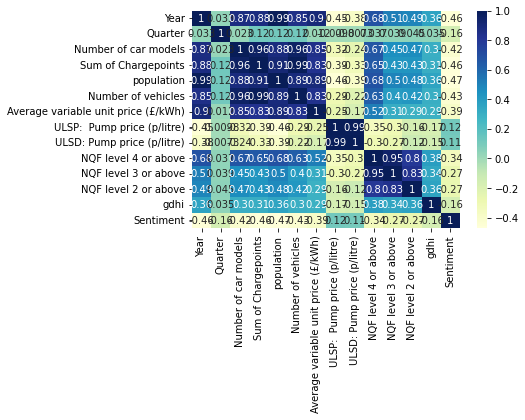

In [4]:
# correlation heatmap for ev_df
corr = ev_df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
# make text in heatmap smaller
plt.rcParams['font.size'] = 3
plt.show()

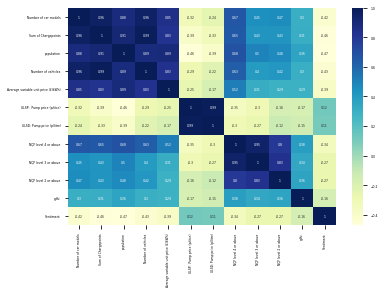

In [5]:
# Drop 'year' and 'quarter' columns
ev_df_check = ev_df.drop(['Year', 'Quarter'], axis=1)

# Correlation heatmap for ev_df
corr = ev_df_check.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Make text in heatmap smaller
plt.rcParams['font.size'] = 8
plt.show()

In [6]:
ev_df.shape

(500, 15)

In [7]:
ev_df.columns

Index(['Year', 'Quarter', 'ITL level 1', 'Number of car models',
       'Sum of Chargepoints', 'population', 'Number of vehicles',
       'Average variable unit price (£/kWh)', 'ULSP:  Pump price (p/litre)',
       'ULSD: Pump price (p/litre)', 'NQF level 4 or above',
       'NQF level 3 or above', 'NQF level 2 or above', 'gdhi', 'Sentiment'],
      dtype='object')

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02316D+02    |proj g|=  2.26146D+03

At iterate    5    f=  1.28804D+01    |proj g|=  1.90064D+00

At iterate   10    f=  1.16632D+01    |proj g|=  1.90880D-01

At iterate   15    f=  1.15395D+01    |proj g|=  2.75256D-02

At iterate   20    f=  1.15173D+01    |proj g|=  6.62535D-03

At iterate   25    f=  1.15155D+01    |proj g|=  6.04614D-04

At iterate   30    f=  1.15136D+01    |proj g|=  4.76378D-03

At iterate   35    f=  1.15135D+01    |proj g|=  1.47394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


  ys=-9.736E-06  -gs= 9.965E-06 BFGS update SKIPPED

At iterate   25    f=  1.12414D+01    |proj g|=  2.32177D-04

At iterate   30    f=  1.12412D+01    |proj g|=  2.25110D-03

At iterate   35    f=  1.12411D+01    |proj g|=  6.66067D-04

At iterate   40    f=  1.12411D+01    |proj g|=  5.54875D-04

At iterate   45    f=  1.12410D+01    |proj g|=  2.62870D-03

At iterate   50    f=  1.12410D+01    |proj g|=  4.10113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     1     0   4.101D-04   1.124D+01
  F =   11.240993591832185     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is uncon


At iterate   25    f=  1.12331D+01    |proj g|=  1.02504D-03

At iterate   30    f=  1.12329D+01    |proj g|=  5.92343D-02

At iterate   35    f=  1.12320D+01    |proj g|=  7.70200D-02

At iterate   40    f=  1.12318D+01    |proj g|=  5.45740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     65      1     0     0   9.060D-04   1.123D+01
  F =   11.231842483630684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17126D+01    |proj g|=  1.74179D+00

At iterate    5    f=  1.15695D+01    |proj g|=  6.77819D-02

At iterate   10    f=  1.15410D+01    |proj g|=  1.45071D-02

At iterate   15    f=  1.15390D+01    |proj g|=  1.40402D-01

At iterate   20    f=  1.13522D+01    |proj g|=  1.01283D+00

At iterate   25    f=  1.12982D+01    |proj g|=  4.56767D-01

At iterate   30    f=  1.12956D+01    |proj g|=  4.72943D-04

At iterate   35    f=  1.12952D+01    |proj g|=  2.12525D-03

At iterate   40    f=  1.12952D+01    |proj g|=  1.86274D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.16296D+01    |proj g|=  4.84420D-02

At iterate   10    f=  1.16138D+01    |proj g|=  1.16530D-02

At iterate   15    f=  1.15992D+01    |proj g|=  1.30365D-01

At iterate   20    f=  1.14659D+01    |proj g|=  3.05698D-02

At iterate   25    f=  1.14294D+01    |proj g|=  5.85799D-01

At iterate   30    f=  1.14181D+01    |proj g|=  2.26075D-03

At iterate   35    f=  1.14180D+01    |proj g|=  2.09480D-02

At iterate   40    f=  1.14167D+01    |proj g|=  1.91611D-01

At iterate   45    f=  1.14154D+01    |proj g|=  6.16192D-03

At iterate   50    f=  1.14154D+01    |proj g|=  1.65577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is uncon

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60919D+01    |proj g|=  1.06260D+01

At iterate    5    f=  1.20046D+01    |proj g|=  2.97970D+00

At iterate   10    f=  1.18239D+01    |proj g|=  1.01958D+00

At iterate   15    f=  1.17526D+01    |proj g|=  6.09290D-01

At iterate   20    f=  1.16530D+01    |proj g|=  3.60366D+00

At iterate   25    f=  1.15640D+01    |proj g|=  1.33455D+00

At iterate   30    f=  1.15517D+01    |proj g|=  1.58753D-02

At iterate   35    f=  1.13370D+01    |proj g|=  7.41055D-01

At iterate   40    f=  1.13172D+01    |proj g|=  2.52247D-02

At iterate   45    f=  1.13128D+01    |proj g|=  2.61711D-01

At iterate   50    f=  1.12990D+01    |proj g|=  3.06509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is uncon


At iterate   10    f=  1.17253D+01    |proj g|=  5.13340D-01

At iterate   15    f=  1.16092D+01    |proj g|=  1.46818D-01

At iterate   20    f=  1.15545D+01    |proj g|=  9.83576D-02

At iterate   25    f=  1.13681D+01    |proj g|=  6.11121D-02

At iterate   30    f=  1.13650D+01    |proj g|=  2.33849D-01

At iterate   35    f=  1.13600D+01    |proj g|=  5.55794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     56      1     0     0   5.558D-02   1.136D+01
  F =   11.359974602277960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f=  1.19436D+01    |proj g|=  7.33495D-01

At iterate   10    f=  1.16054D+01    |proj g|=  3.19710D-01

At iterate   15    f=  1.15671D+01    |proj g|=  1.77527D-01

At iterate   20    f=  1.15248D+01    |proj g|=  8.83749D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   25    f=  1.13323D+01    |proj g|=  1.52890D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     25     43      1     0     0   1.529D-01   1.133D+01
  F =   11.332280347565501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57455D+01    |proj g|=  1.22281D+01

At iterate    5    f=  1.19126D+01    |proj g|=  6.16780D-01

At iterate   10    f=  1.16128D+01    |proj g|=  6.43566D-01

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  1.13172D+01    |proj g|=  2.13445D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     81      1     0     0   2.134D-01   1.132D+01
  F =   11.317214313066092     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17041D+01    |proj g|=  4.00495D-01

At iterate    5    f=  1.15741D+01    |proj g|=  2.40126D-01

At iterate   10    f=  1.15564D+01    |proj g|=  1.43628D-02

At iter

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.13136D+01    |proj g|=  2.92851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     73      1     0     0   2.929D-02   1.131D+01
  F =   11.313566727329516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17670D+01    |proj g|=  4.24007D-01

At iterate    5    f=  1.16112D+01    |proj g|=  2.81866D-02

At iterate   10    f=  1.15742D+01    |proj g|=  6.16942D-01

At iterate   15    f=  1.15690D+01    |proj g|=  1.00077D-01

At iterate   20    f=  1.14141D+01    |proj g|=  5.28272D-01

At iterate   25    f=  1.13948D+01    |proj g|=  3.98056D-02

At iterate   30    f=  1.13833D+01    |proj g|=  4.27274D-01

At iterate   35    f=  1.13804D+01    |proj g|=  1.08749D-03

At iterate   40    f=  1.13799D+01    |proj g|=  4.31757D-02

At iterate   45    f=  1.13772D+01    |proj g|=  4.33279D-02

At iterate   50    f=  1.13768D+01    |proj g|=  1.36937D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


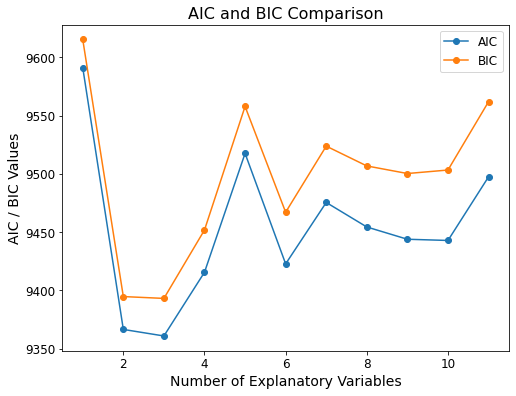

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your dependent variable and explanatory variables
# create original_explanatory_vars list of all columns in ev_df except dependent_var, Year, Quarter 
original_explanatory_vars = list(ev_df.columns)
dependent_var = 'Number of vehicles'
explanatory_vars = [var for var in original_explanatory_vars if var not in ['Number of vehicles', 'Year', 'Quarter','ITL level 1']]

# split into train/test datasets
train_df = ev_df[:'2019-03-31']
test_df = ev_df['2019-04-01':]

# List to store AIC and BIC values for different models
aic_values = []
bic_values = []

# Fit and compare SARIMAX models with different numbers of explanatory variables
for i in range(1, len(explanatory_vars) + 1):
    current_exog = train_df[explanatory_vars[:i]]
    sarimax_model = SARIMAX(train_df[dependent_var], exog=current_exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
    sarimax_result = sarimax_model.fit()
    aic_values.append(sarimax_result.aic)
    bic_values.append(sarimax_result.bic)

# Plot the AIC and BIC values for different models
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explanatory_vars) + 1), aic_values, label='AIC', marker='o')
plt.plot(range(1, len(explanatory_vars) + 1), bic_values, label='BIC', marker='o')
plt.xlabel('Number of Explanatory Variables', fontsize=14)
plt.ylabel('AIC / BIC Values', fontsize=14)
plt.title('AIC and BIC Comparison', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70271D+01    |proj g|=  4.06930D+01

At iterate    5    f=  1.19038D+01    |proj g|=  8.43054D-01

At iterate   10    f=  1.16872D+01    |proj g|=  4.34688D-01

At iterate   15    f=  1.14806D+01    |proj g|=  6.68887D-02

At iterate   20    f=  1.14428D+01    |proj g|=  2.81081D-02

At iterate   25    f=  1.12821D+01    |proj g|=  2.91167D-01

At iterate   30    f=  1.12087D+01    |proj g|=  1.10329D-01

At iterate   35    f=  1.11980D+01    |proj g|=  9.33361D-03

At iterate   40    f=  1.11967D+01    |proj g|=  4.80083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

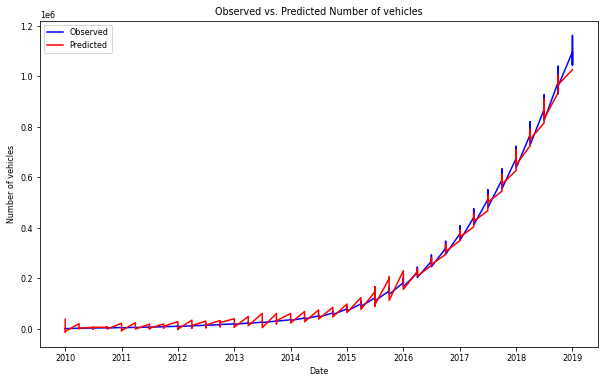

In [9]:
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'Sum of Chargepoints']



# Fit the SARIMAX model
endog = train_df[dependent_var]
exog = train_df[explanatory_vars]
sarimax_model_3_1 = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
sarimax_result_3_1 = sarimax_model_3_1.fit()

# Print the summary of the SARIMAX model
print(sarimax_result_3_1.summary())


# Get the predicted values from the SARIMAX model
predicted_values_3_1 = sarimax_result_3_1.predict(start=exog.index[0], end=exog.index[-1], exog=exog)

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Observed', color='blue')
plt.plot(predicted_values_3_1.index, predicted_values_3_1, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63946D+01    |proj g|=  2.66350D+01

At iterate    5    f=  1.19488D+01    |proj g|=  8.05887D-01

At iterate   10    f=  1.17217D+01    |proj g|=  2.31417D-01

At iterate   15    f=  1.15381D+01    |proj g|=  7.49533D-02

At iterate   20    f=  1.12557D+01    |proj g|=  8.31366D-01

At iterate   25    f=  1.12331D+01    |proj g|=  9.86818D-04

At iterate   30    f=  1.12329D+01    |proj g|=  7.00408D-02

At iterate   35    f=  1.12319D+01    |proj g|=  4.28829D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.12318D+01    |proj g|=  1.94641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     74      2     0     0   1.946D-04   1.123D+01
  F =   11.231847534811035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                Number of vehicles   No. Observations:                  416
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -4672.449
Date:                           Fri, 11 Aug 2023   AIC                           9360.897
T

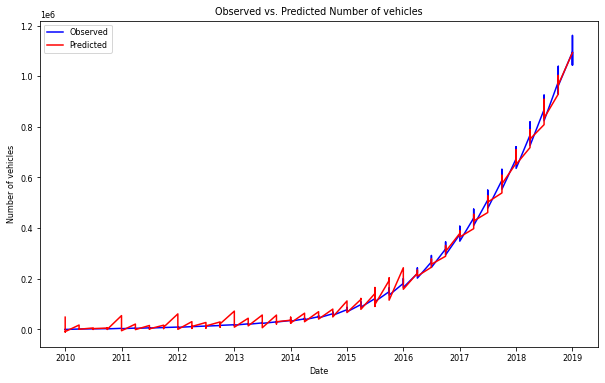

In [10]:
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Number of car models',
                    'Sum of Chargepoints']


# Fit the SARIMAX model
endog = train_df[dependent_var]
exog = train_df[explanatory_vars]
sarimax_model_3_2 = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
sarimax_result_3_2 = sarimax_model_3_2.fit()

# Print the summary of the SARIMAX model
print(sarimax_result_3_2.summary())


# Get the predicted values from the SARIMAX model
predicted_values_3_2 = sarimax_result_3_2.predict(start=exog.index[0], end=exog.index[-1], exog=exog)

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Observed', color='blue')
plt.plot(predicted_values_3_2.index, predicted_values_3_2, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17126D+01    |proj g|=  1.74179D+00

At iterate    5    f=  1.15695D+01    |proj g|=  6.77818D-02

At iterate   10    f=  1.15410D+01    |proj g|=  1.45071D-02

At iterate   15    f=  1.15390D+01    |proj g|=  1.40403D-01

At iterate   20    f=  1.13522D+01    |proj g|=  1.01261D+00

At iterate   25    f=  1.12982D+01    |proj g|=  4.56649D-01

At iterate   30    f=  1.12956D+01    |proj g|=  4.75625D-04

At iterate   35    f=  1.12952D+01    |proj g|=  3.17357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

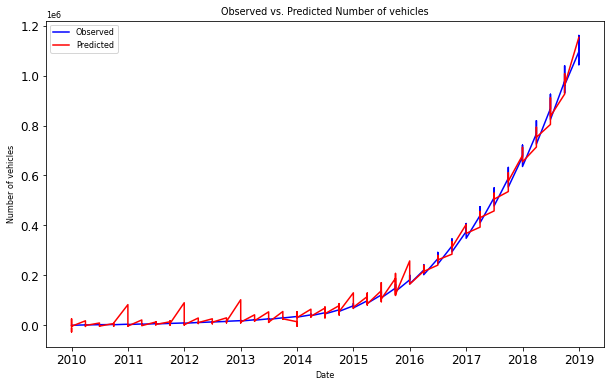

In [11]:


# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'Sum of Chargepoints', 'Number of car models']

# Fit the SARIMAX model
endog = train_df[dependent_var]
exog = train_df[explanatory_vars]
sarimax_model_4 = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
sarimax_result_4 = sarimax_model_4.fit()

# Print the summary of the SARIMAX model
print(sarimax_result_4.summary())



# Get the predicted values from the SARIMAX model
predicted_values_4 = sarimax_result_4.predict(start=exog.index[0], end=exog.index[-1], exog=exog)

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Observed', color='blue')
plt.plot(predicted_values_4.index, predicted_values_4, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Normaltest p-value: 7.605013561951048e-16


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


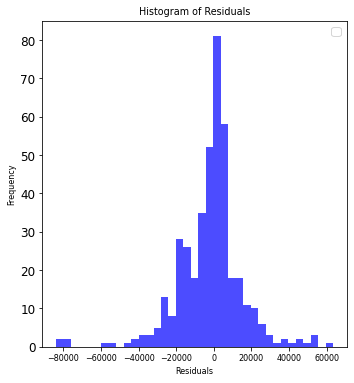

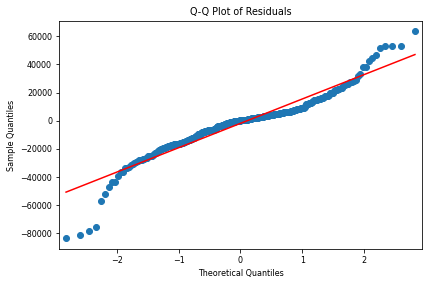

In [12]:


# Assuming 'sarimax_result' contains the fitted SARIMAX model results

# Get the residuals from the fitted model
residuals = sarimax_result_4.resid

# Shapiro-Wilk test for normality
normaltest_result = stats.normaltest(residuals)
print("Normaltest p-value:", normaltest_result.pvalue)

# Visual inspection: Histogram and Q-Q plot
plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
sm.graphics.qqplot(residuals, line='s', color='blue')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


R-squared (R2 ): 0.8451896666053208
Mean Squared Error (MSE): 18731798862.5227
Root Mean Squared Error (RMSE): 136864.16208241915


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


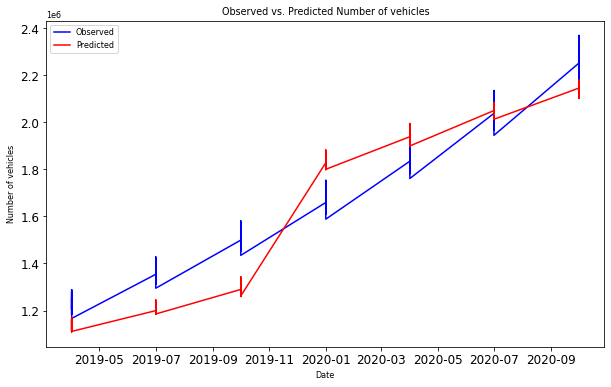

In [13]:

endog_test = test_df[dependent_var]
exog_test = test_df[explanatory_vars]

predicted_values = sarimax_result_4.forecast(84, exog=test_df[explanatory_vars])
predicted_values.index = test_df.index

mse = mean_squared_error(endog_test, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(endog_test, predicted_values)

print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog_test.index, endog_test, label='Observed', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)


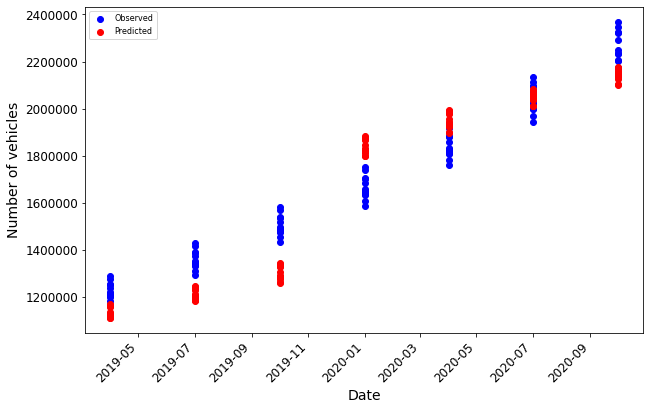

In [14]:
# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(endog_test.index, endog_test, label='Observed', color='blue')
plt.scatter(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# increase the size of the axes labels
plt.gca().set_ylabel('Number of vehicles', fontsize=14)
plt.gca().set_xlabel('Date', fontsize=14)
# remove 1e6 scale from y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
# rotate the x-axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import r2_score, mean_squared_error

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mse = mean_squared_error(actual,forecast) # mse
    r2 = r2_score(actual,forecast) #r2
    print({'mape':mape, 'rmse':rmse, 'mse':mse, 'r2':r2})
    return({mape, rmse, mse, r2})

mape, rmse, mse, r2 = forecast_accuracy(predicted_values,endog_test)

metrics = pd.DataFrame(data = (mape, rmse, mse, r2),\
                        index = ('mape', 'rmse', 'mse', 'r2'))

{'mape': 0.07798048498847703, 'rmse': 136864.16208241915, 'mse': 18731798862.5227, 'r2': 0.8451896666053208}


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


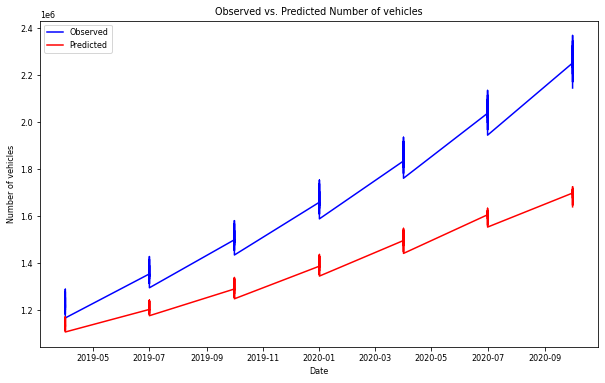

R-squared (R2 ): 0.0737178866519016
Mean Squared Error (MSE): 112078631036.55962
Root Mean Squared Error (RMSE): 334781.4675823015


In [16]:
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'Sum of Chargepoints']
                    
endog_test = test_df[dependent_var]
exog_test = test_df[explanatory_vars]

predicted_values = sarimax_result_3_1.forecast(84, exog=test_df[explanatory_vars])
predicted_values.index = test_df.index

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog_test.index, endog_test, label='Observed', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(endog_test, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(endog_test, predicted_values)

print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


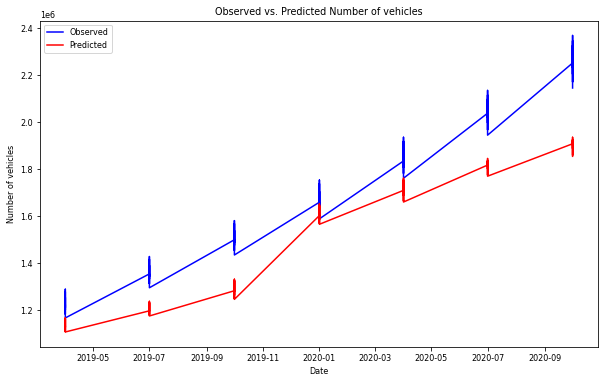

R-squared (R2 ): 0.6675259096342014
Mean Squared Error (MSE): 40228824854.054504
Root Mean Squared Error (RMSE): 200571.24632921466


In [17]:
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Number of car models',
                    'Sum of Chargepoints']

endog_test = test_df[dependent_var]
exog_test = test_df[explanatory_vars]

predicted_values = sarimax_result_3_2.forecast(84, exog=test_df[explanatory_vars])
predicted_values.index = test_df.index

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog_test.index, endog_test, label='Observed', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(endog_test, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(endog_test, predicted_values)

print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [18]:


# Columns to exclude
exclude_columns = ['Year', 'Quarter', 'ITL level 1']

# Columns to compute statistics for
stat_columns = [col for col in ev_df.columns if col not in exclude_columns]

# Compute the statistics
stats_df = ev_df[stat_columns].describe(include='all')  # This provides count, mean, std, min, 25%, 50%, 75%, max
stats_df.loc['mode'] = ev_df[stat_columns].mode().iloc[0]  # Add mode to the statistics

# Filter to include only the required statistics
filtered_stats_df = stats_df.loc[['mean', '50%', 'mode', 'std', 'min', 'max']]
filtered_stats_df.rename(index={'50%': 'median'}, inplace=True)  # Rename 50% to median
filtered_stats_df



Number of car models  Sum of Chargepoints    population  \
mean               10.734000         12294.836000  6.410019e+06   
median              8.000000          6724.500000  6.244614e+06   
mode                8.000000             0.000000  2.350347e+04   
std                 7.093086         14771.866581  4.119578e+06   
min                 2.000000             0.000000  2.350347e+04   
max                29.000000         56140.000000  1.378856e+07   

        Number of vehicles  Average variable unit price (£/kWh)  \
mean          4.804927e+05                             0.142937   
median        1.414754e+05                             0.140394   
mode          7.453333e+02                             0.106334   
std           6.343142e+05                             0.018654   
min           3.500000e+00                             0.105938   
max           2.368460e+06                             0.182229   

        ULSP:  Pump price (p/litre)  ULSD: Pump price (p/litre)  \
mean                     122.508339                  127.250413   
median                   124.816777                  129.945303   
mode                     114.092268                  129.945303   
std                        9.124600                   10.492224   
min                      108.949773                  110.420045   
max                      135.761462                  142.171851   

        NQF level 4 or above  NQF level 3 or above  NQF level 2 or above  \
mean               41.026000              62.14800             80.080000   
median             41.000000              63.00000             81.000000   
mode               41.000000              63.00000             81.000000   
std                 3.857341               4.00677              2.595973   
min                31.000000              50.00000             70.000000   
max                52.000000              71.00000             83.000000   

                gdhi  Sentiment  
mean    18417.673265   0.311491  
median  17433.916667   0.278215  
mode    15329.833333   0.088100  
std      3715.039701   0.119565  
min     11245.000000   0.088100  
max     31620.904762   0.796120

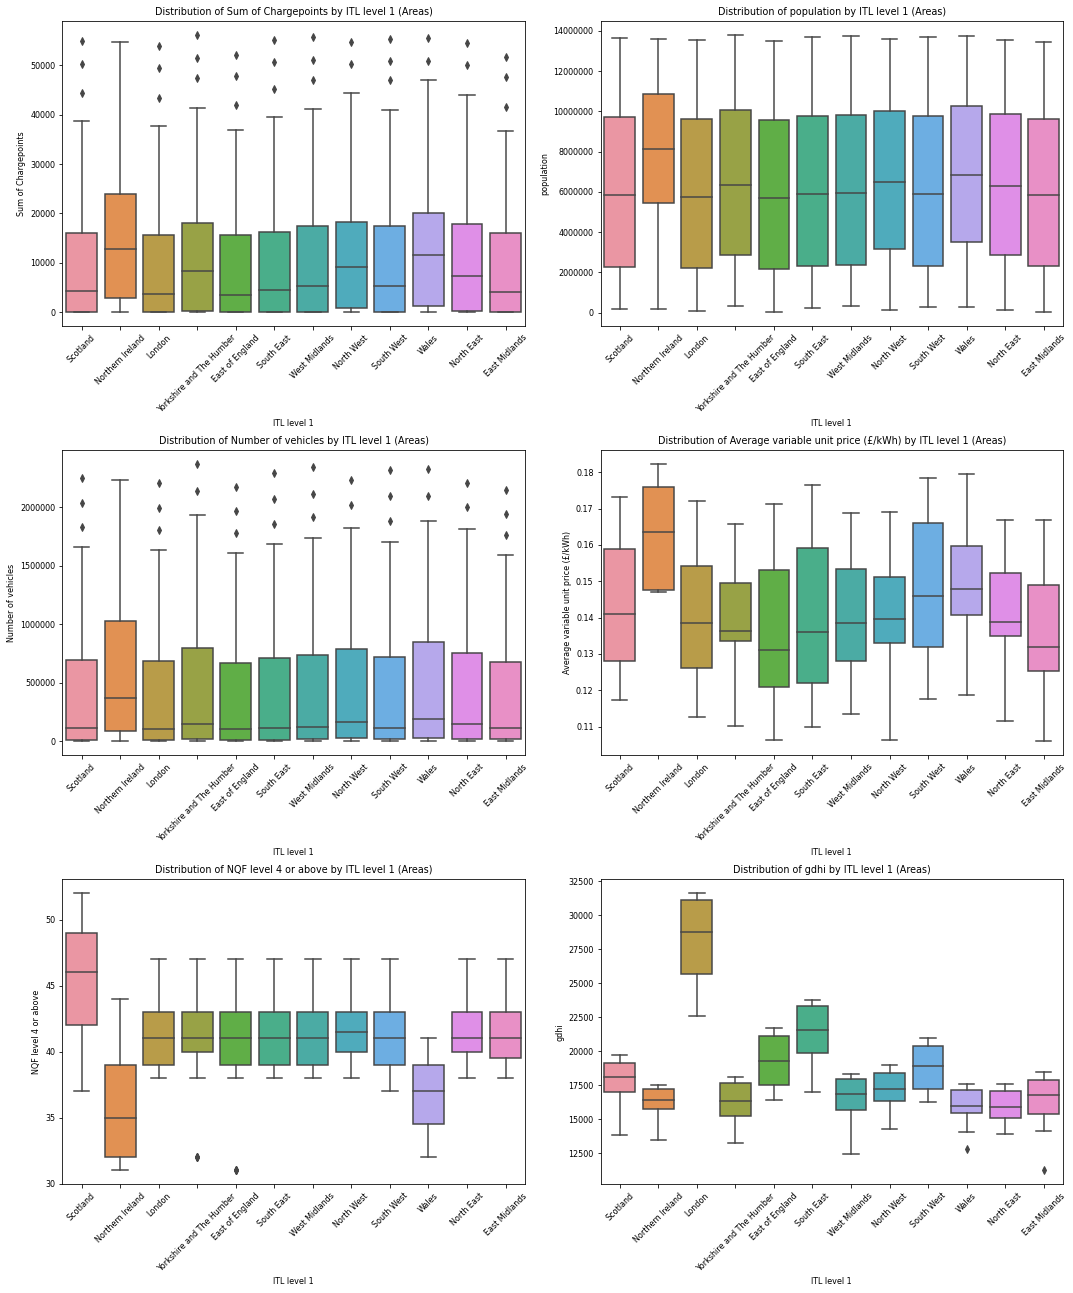

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ev_df_sample_adjusted = ev_df

# Columns to exclude from the box plots
exclude_columns_boxplot = ['ITL level 1', 'Year', 'Quarter', 'Number of car models','Sentiment','ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)', 'NQF level 2 or above', 'NQF level 3 or above']

# Adjusted columns for which we want to generate box plots
columns_to_plot_adjusted = [col for col in ev_df_sample_adjusted.columns if col not in exclude_columns_boxplot]

# Proceeding with plotting

# Determine the grid size based on number of columns to plot
num_plots = len(columns_to_plot_adjusted)
num_rows = int(num_plots / 2) + (num_plots % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))

# Flatten axes for easy iteration
flat_axes = axes.flatten()

# Create box plots in the grid
for i, column in enumerate(columns_to_plot_adjusted):
    sns.boxplot(x='ITL level 1', y=column, data=ev_df_sample_adjusted, ax=flat_axes[i])
    flat_axes[i].set_title(f'Distribution of {column} by ITL level 1 (Areas)')
    flat_axes[i].tick_params(axis='x', rotation=45)
    flat_axes[i].ticklabel_format(style='plain', axis='y')

# Remove any unused subplots
for j in range(i+1, len(flat_axes)):
    fig.delaxes(flat_axes[j])

plt.tight_layout()
plt.show()


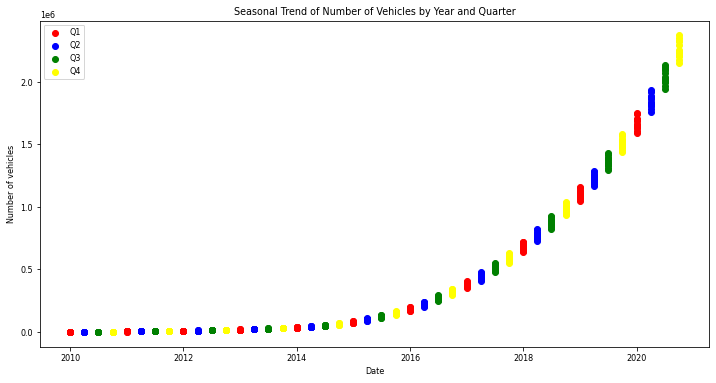

In [20]:
# Convert year and quarter into a single datetime column
ev_df['Date'] = pd.to_datetime(ev_df['Year'].astype(str) + '-Q' + ev_df['Quarter'].astype(str))

import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a color map for the quarters
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'yellow'}
quarters = ev_df['Quarter'].unique()

# Plot data for each quarter with different colors
for quarter in quarters:
    subset = ev_df[ev_df['Quarter'] == quarter]
    ax.scatter(subset['Date'], subset['Number of vehicles'], label=f'Q{quarter}', color=colors[quarter])

# Set title, labels, and legend
ax.set_title('Seasonal Trend of Number of Vehicles by Year and Quarter')
ax.set_xlabel('Date')
ax.set_ylabel('Number of vehicles')
ax.legend()

plt.show()


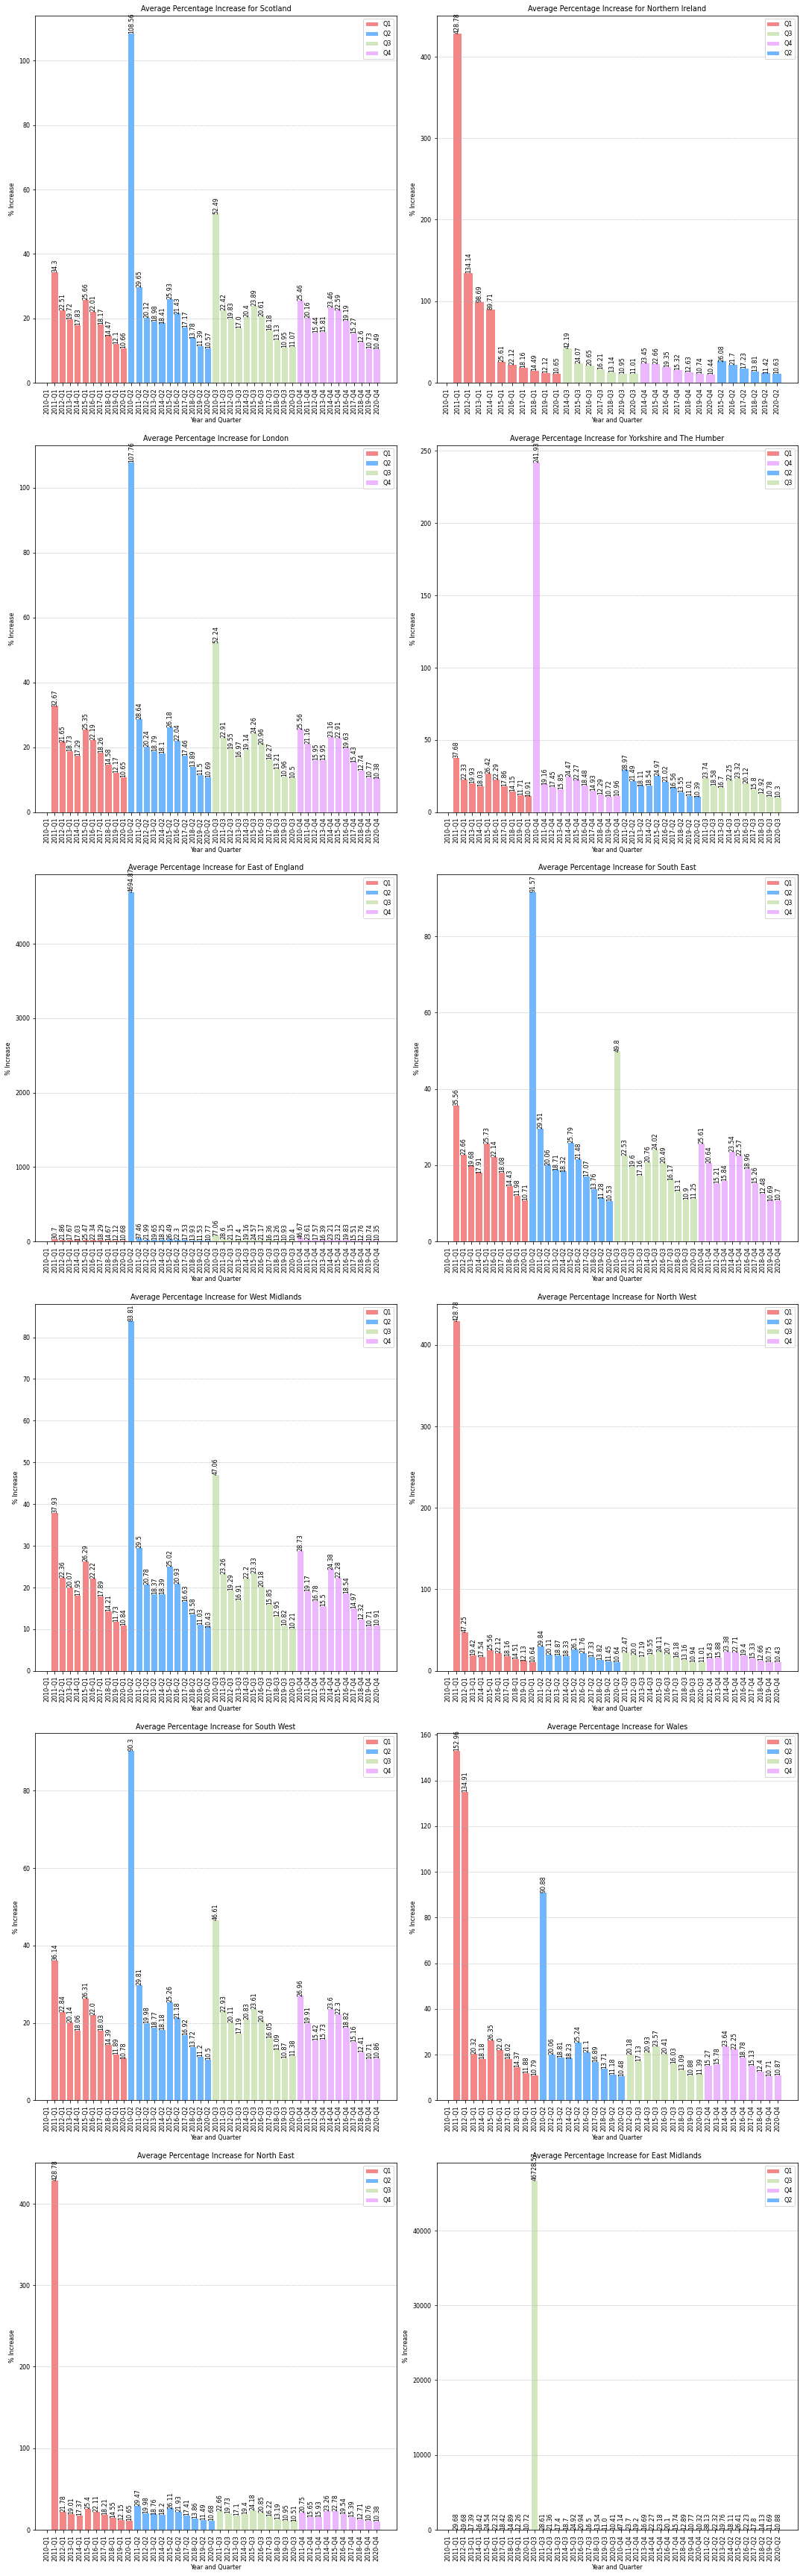

In [21]:

dummy_ev_df = ev_df.copy()
# Define a color map for the quarters
quarter_colors = {1: '#EE5555', 2: '#3399FF', 3: '#C1DEA4', 4: '#E599FF'}
# Calculate the percentage increase for the dummy dataset
dummy_ev_df['% Increase'] = dummy_ev_df.groupby('ITL level 1')['Number of vehicles'].pct_change() * 100

# Convert year and quarter into a single datetime column for plotting purposes
dummy_ev_df['Date'] = pd.to_datetime(dummy_ev_df['Year'].astype(str) + '-Q' + dummy_ev_df['Quarter'].astype(str))

# Number of unique "ITL level 1" regions
num_regions_dummy = dummy_ev_df['ITL level 1'].nunique()

# Determine the grid size based on the number of unique regions
num_rows_dummy = (num_regions_dummy + 1) // 2

# Create subplots with 2 plots on each row
fig, axes = plt.subplots(num_rows_dummy, 2, figsize=(15, 8 * num_rows_dummy))
flat_axes = axes.flatten()

# Plot bar charts for each region on separate subplots, colored by quarter
for idx, region in enumerate(dummy_ev_df['ITL level 1'].unique()):
    subset = dummy_ev_df[dummy_ev_df['ITL level 1'] == region].sort_values(by=['Year', 'Quarter'])
    subset['Year_Quarter'] = subset['Year'].astype(str) + '-Q' + subset['Quarter'].astype(str)
    
    for quarter in subset['Quarter'].unique():
        quarter_subset = subset[subset['Quarter'] == quarter]
        bars = flat_axes[idx].bar(quarter_subset['Year_Quarter'], 
                                  quarter_subset['% Increase'], 
                                  label=f'Q{quarter}', 
                                  color=quarter_colors[quarter], 
                                  alpha=0.7)
        
        # Add annotations to the bars
        for bar in bars:
            yval = bar.get_height()
            if not np.isnan(yval):  # Ensure the value is not NaN before annotating
                flat_axes[idx].text(bar.get_x() + bar.get_width()/2, yval, 
                                    round(yval, 2), ha='center', va='bottom', rotation=90, color='black')
                
    flat_axes[idx].set_title(f'Average Percentage Increase for {region}')
    flat_axes[idx].set_xlabel('Year and Quarter')
    flat_axes[idx].set_ylabel('% Increase')
    flat_axes[idx].legend()
    flat_axes[idx].grid(axis='y', linestyle='--', linewidth=0.5)
    flat_axes[idx].tick_params(axis='x', rotation=90)

# If there's an odd number of regions, remove the last unused subplot
if num_regions_dummy % 2 != 0:
    fig.delaxes(flat_axes[-1])

plt.tight_layout()
plt.show()


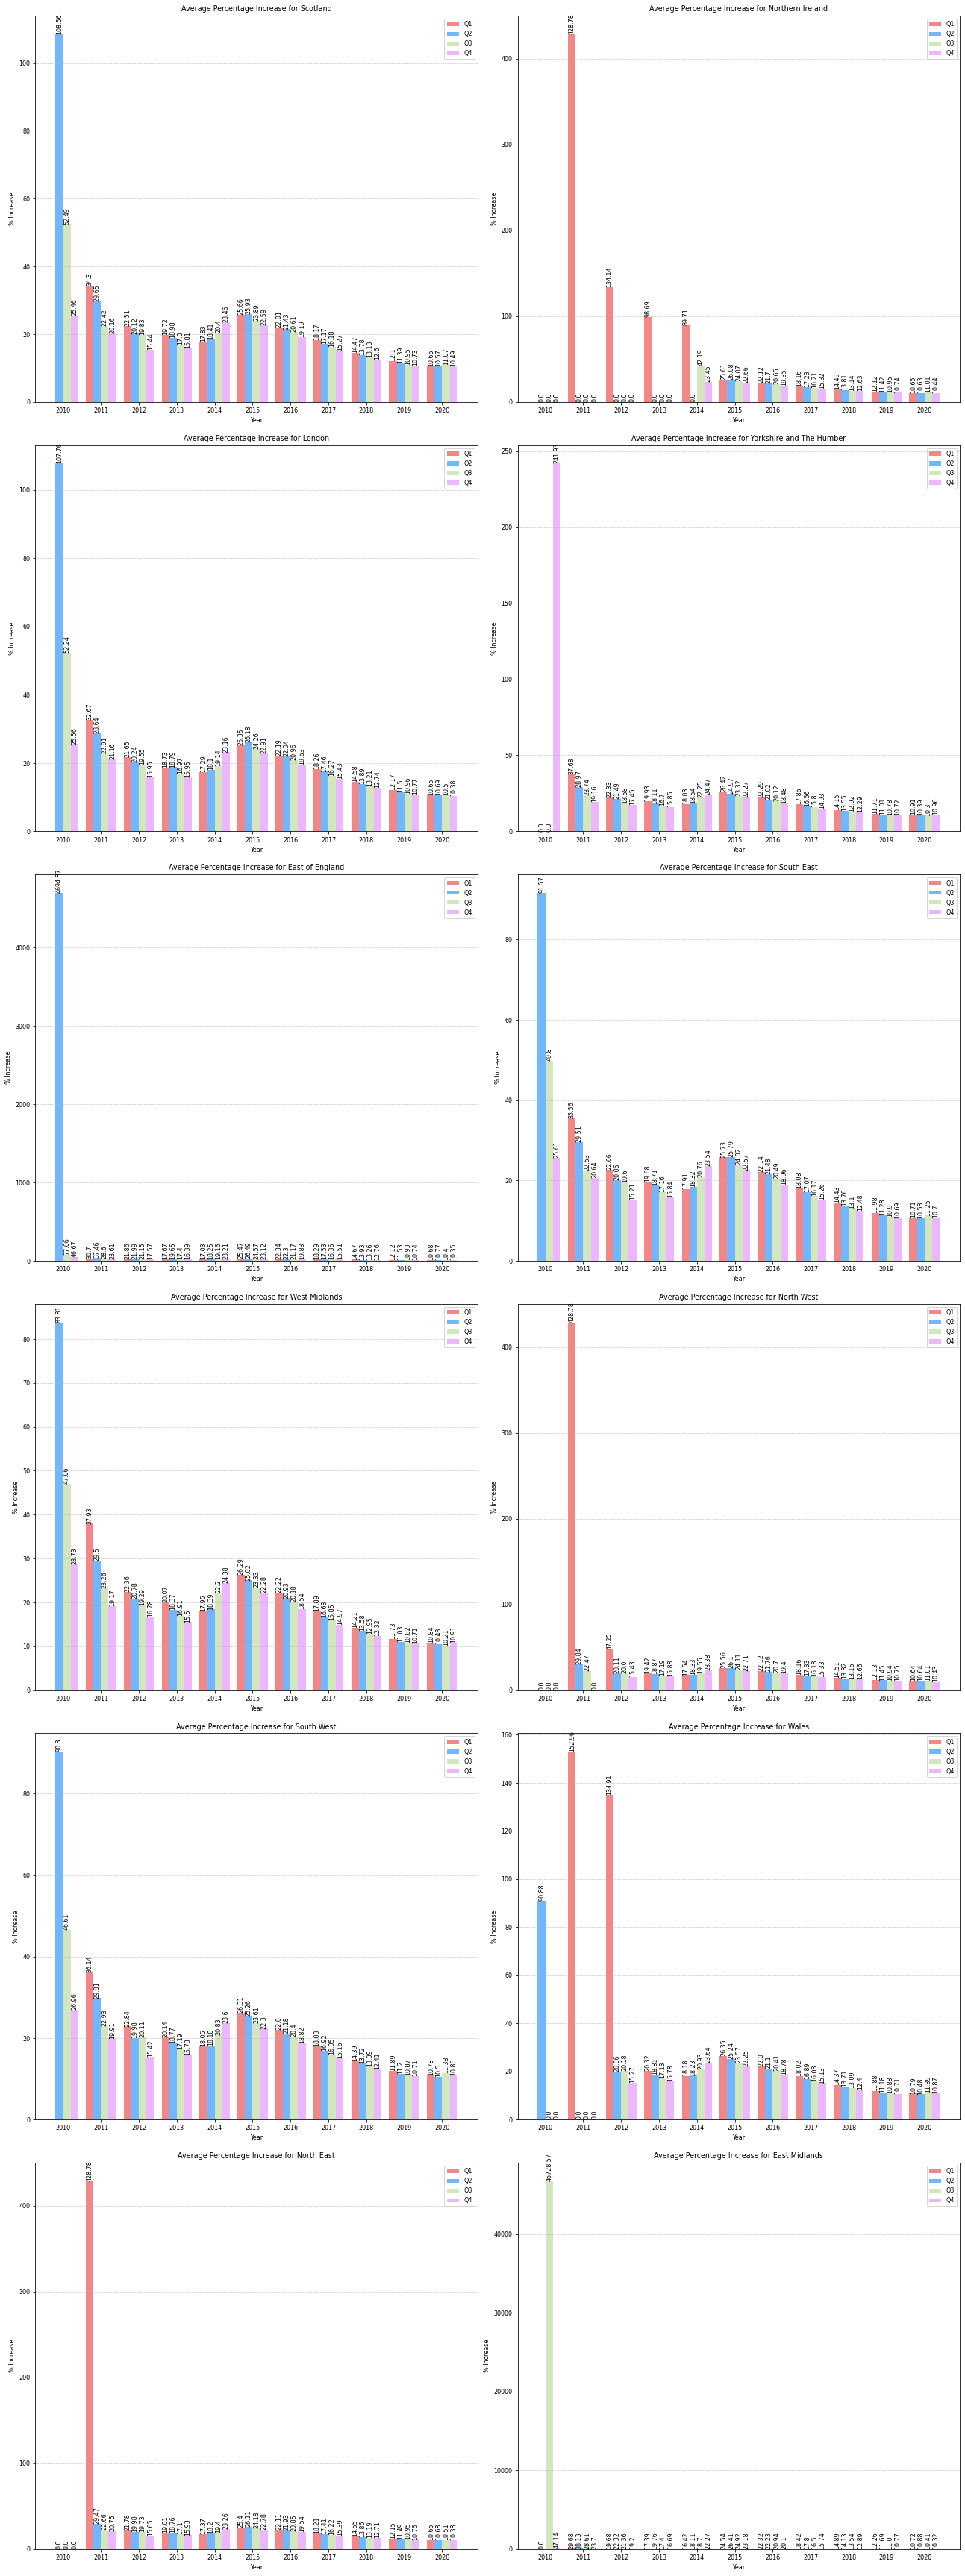

In [22]:
# Ensure that each region has an entry for each quarter of every year
years = dummy_ev_df['Year'].unique()
quarters = [1, 2, 3, 4]
regions = dummy_ev_df['ITL level 1'].unique()

# Create a DataFrame with all possible combinations of region, year, and quarter
complete_index = pd.MultiIndex.from_product([regions, years, quarters], names=['ITL level 1', 'Year', 'Quarter'])
complete_df = pd.DataFrame(index=complete_index).reset_index()

# Merge this with the original dummy_ev_df to ensure complete data
merged_df = pd.merge(complete_df, dummy_ev_df, on=['ITL level 1', 'Year', 'Quarter'], how='left')

# Calculate the percentage increase for the merged dataset
merged_df['% Increase'] = merged_df.groupby('ITL level 1')['Number of vehicles'].pct_change() * 100

# Convert year and quarter into a single datetime column for plotting purposes
merged_df['Year_Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

# Plot bar charts for each region on separate subplots, with bars grouped by year
fig, axes = plt.subplots(num_rows_dummy, 2, figsize=(18, 8 * num_rows_dummy))
flat_axes = axes.flatten()

# Define the bar width
bar_width = 0.2

for idx, region in enumerate(merged_df['ITL level 1'].unique()):
    subset = merged_df[merged_df['ITL level 1'] == region].sort_values(by=['Year', 'Quarter'])
    
    # Create a list to store bar positions for each quarter
    bar_positions = np.arange(len(subset['Year'].unique()))
    
    for qidx, quarter in enumerate(subset['Quarter'].unique()):
        quarter_subset = subset[subset['Quarter'] == quarter]
        bars = flat_axes[idx].bar(bar_positions + qidx*bar_width, 
                                  quarter_subset['% Increase'], 
                                  width=bar_width,
                                  label=f'Q{quarter}', 
                                  color=quarter_colors[quarter], 
                                  alpha=0.7)
        
        # Add annotations to the bars
        for bar in bars:
            yval = bar.get_height()
            if not np.isnan(yval):  # Ensure the value is not NaN before annotating
                flat_axes[idx].text(bar.get_x() + bar.get_width()/2, yval, 
                                    round(yval, 2), ha='center', va='bottom', rotation=90, color='black')
                
    flat_axes[idx].set_title(f'Average Percentage Increase for {region}')
    flat_axes[idx].set_xlabel('Year')
    flat_axes[idx].set_ylabel('% Increase')
    flat_axes[idx].set_xticks(bar_positions + bar_width*1.5)  # Adjusting x-ticks to the middle of the bar group
    flat_axes[idx].set_xticklabels(quarter_subset['Year'].unique())
    flat_axes[idx].legend()
    flat_axes[idx].grid(axis='y', linestyle='--', linewidth=0.5)

# If there's an odd number of regions, remove the last unused subplot
if num_regions_dummy % 2 != 0:
    fig.delaxes(flat_axes[-1])

plt.tight_layout()
plt.show()


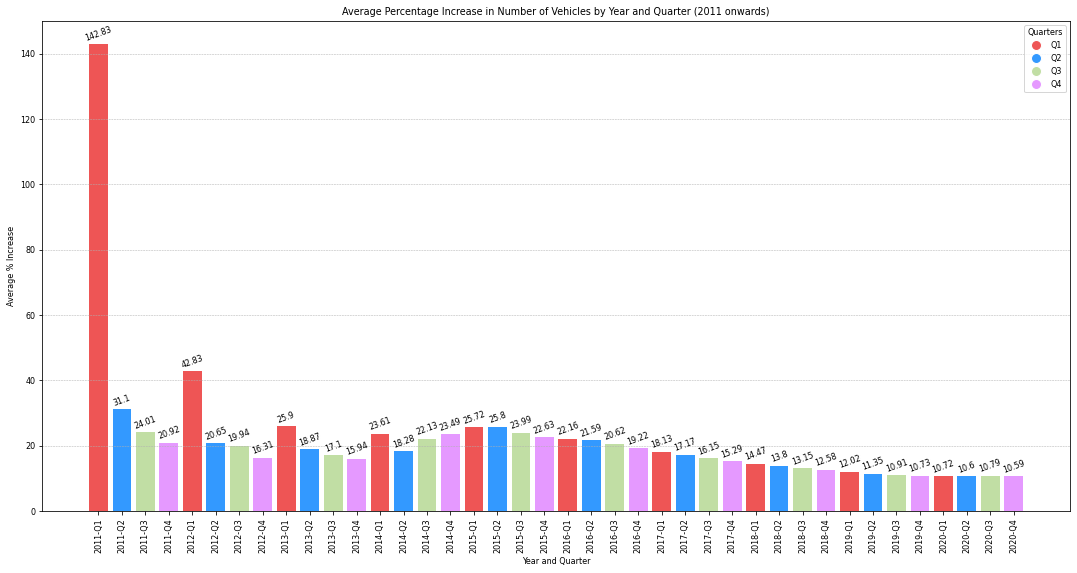

In [23]:

sample_ev_df_demo = ev_df.copy()
# Calculate the percentage increase for 'Number of vehicles'
sample_ev_df_demo['% Increase'] = sample_ev_df_demo.groupby('ITL level 1')['Number of vehicles'].pct_change() * 100
# Filter the dataset to include only data from 2011 onwards
filtered_increase = sample_ev_df_demo[sample_ev_df_demo['Year'] >= 2011]

# Group by 'Year' and 'Quarter' and calculate the mean of the '% Increase' column
average_increase_filtered = filtered_increase.groupby(['Year', 'Quarter'])['% Increase'].mean().reset_index()

# Convert 'Year' and 'Quarter' into a single column for plotting
average_increase_filtered['Year_Quarter'] = average_increase_filtered['Year'].astype(str) + '-Q' + average_increase_filtered['Quarter'].astype(str)

# Plotting with vertical annotations and the new color scheme
plt.figure(figsize=(15, 8))
bars = plt.bar(average_increase_filtered['Year_Quarter'], 
               average_increase_filtered['% Increase'], 
               color=[quarter_colors[q] for q in average_increase_filtered['Quarter']])

# Add vertical annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), 
             ha='center', va='bottom', rotation=20, color='black')

plt.title('Average Percentage Increase in Number of Vehicles by Year and Quarter (2011 onwards)')
plt.xlabel('Year and Quarter')
plt.ylabel('Average % Increase')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=f'Q{q}', markersize=10, markerfacecolor=quarter_colors[q]) for q in quarter_colors]
plt.legend(handles=patches, title='Quarters')

plt.tight_layout()
plt.show()




array(['Scotland', 'Northern Ireland', 'London',
       'Yorkshire and The Humber', 'East of England', 'South East',
       'West Midlands', 'North West', 'South West', 'Wales', 'North East',
       'East Midlands'], dtype=object)